# Notebook to use functions

Run installations

In [6]:
!pip install pytube
!pip install pydub
!pip install googletrans==3.1.0a0
!pip install datasets
!pip install ujson
!pip install --upgrade google-api-python-client
!pip install moviepy
!pip install librosa
!pip install matplotlib
!pip install isodate
!pip install yt-dlp
# on local do :  apt install -y ffmpeg



Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 3.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.89.0
    Uninstalling google-api-python-client-2.89.0:
      Successfully uninstalled google-api-python-client-2.89.0
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-package

Checking if translation is not gendered

In [5]:
from retrieve_url import *
lang_ids = {
    "afrikaans": "af", 
    "arabic": "ar", 
    "chinese": "zh-CN", # googletrans' convention for detecting language
    "croatian": "hr", 
    "czech": "cs", 
    "german": "de", 
    "estonian": "et", 
    "english": "en", 
    "spanish": "es", 
    "french": "fr", 
    "greek": "el", 
    "hebrew": "iw", # the new standard is "he", acceptable input, but not the output convention of googletrans
    "korean": "ko", 
    "hungarian": "hu", 
    "icelandic": "is",
    "indonesian": "id", 
    "hindi": "hi", 
    "italian": "it", 
    "japanese": "ja", 
    "lithuanian": "lt", 
    "malay": "ms", 
    "dutch": "nl", 
    "maori": "mi", 
    "polish": "pl", 
    "portuguese": "pt", 
    "romanian": "ro", 
    "swedish": "sv", 
    "telugu": "te", 
    "turkish": "tr"
}
translator = Translator()
lang_qs = {lang: translator.translate('children cartoon', dest=lang_ids[lang]).text for lang in langs}
print(lang_qs)
lang_qs_back={lang:translator.translate(lang_qs[lang],dest='english').text for lang in langs}
print(lang_qs_back)

{'afrikaans': 'kinders spotprent', 'arabic': 'كارتون الأطفال', 'chinese': '儿童卡通', 'croatian': 'dječji crtić', 'czech': 'dětská karikatura', 'german': 'Kinderkarikatur', 'estonian': 'laste multikas', 'english': 'children cartoon', 'spanish': 'dibujos animados de niños', 'french': 'dessin animé pour enfants', 'greek': 'παιδικά κινούμενα σχέδια', 'hebrew': 'קריקטורה לילדים', 'korean': '어린이 만화', 'hungarian': 'gyerekek rajzfilm', 'icelandic': 'teiknimynd fyrir börn', 'indonesian': 'kartun anak-anak', 'hindi': 'बच्चों का कार्टून', 'italian': 'cartone animato per bambini', 'japanese': '子供の漫画', 'lithuanian': 'animacinis filmas vaikams', 'malay': 'kartun kanak-kanak', 'dutch': 'kinderen tekenfilm', 'maori': 'pakiwaituhi tamariki', 'polish': 'kreskówka dla dzieci', 'portuguese': 'desenho animado infantil', 'romanian': 'desen animat pentru copii', 'swedish': 'barn tecknad', 'telugu': 'పిల్లల కార్టూన్', 'turkish': 'çocuk karikatür'}
{'afrikaans': 'children cartoon', 'arabic': "Children's cartoon",

## 2. Retrieving url of youtube API

In [4]:
from retrieve_url import *
langs1 = ["afrikaans", "arabic", "chinese", "croatian", "czech", "german"]
langs2 =["estonian", "english", "spanish", "french", 
         "greek", "hebrew"] 
langs3=["korean", "hungarian", "icelandic","indonesian", "hindi", "italian"]
langs4=["japanese", "lithuanian",
         "malay", "dutch", "polish"]
langs5=["portuguese", "romanian", "swedish", "telugu"]

#maori was removed to avoid error
#turkish removed because it translates children to boy


#repeat the search for all the list of languages
developper_key="XXXXXX"
duration=["long"]
search_video_youtube_languages(langs1,"2021",developper_key,'children cartoon',duration)

A json file for this language and year already exists. Skipping...
A json file for this language and year already exists. Skipping...
A json file for this language and year already exists. Skipping...
A json file for this language and year already exists. Skipping...
A json file for this language and year already exists. Skipping...


In [7]:
check_number_url(langs,2012)

no videos for language : german
no videos for language : hebrew
no json files for languae :  maori
no json files for languae :  turkish


# Generating df dataset

In [1]:
from create_df_dataset import *

#df=generate_df_dataset("spanish")
#df.to_csv("datasets/spanish_dataset.csv")

# Training

## import and preparing data

In [4]:
df=pd.read_csv(f"datasets/english_dataset.csv")
df

,chunk,lang,video_id,start,end
0,5,english,V1VX9HoiyCI,21.941667,26.941667
1,3,english,tsmSM_sCBbo,10.616667,15.616667
2,9,english,htfevr4H80Q,42.383333,47.383333
3,9,english,XNjDsf9ELnY,40.800000,45.800000
4,5,english,kRQCiw2slfc,20.783333,25.783333
...,...,...,...,...,...
13653,1,english,ebUcop3TjfI,0.875000,5.875000
13654,5,english,prOFnIoG2hY,20.383333,25.383333
13655,4,english,YwK0YyfTKnU,15.858333,20.858333
13656,2,english,40LiJ4BEPig,6.025000,11.025000


In [2]:
from model_train_score import *
from autoencoder import *
import pandas as pd
from sklearn.model_selection import train_test_split
from experience import *
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
language="english"
df=pd.read_csv(f"datasets/{language}_dataset.csv")
df_train,df_test=train_test_split(df,test_size=0.1,random_state=42)
df_train,df_validation=train_test_split(df_train,test_size=0.1,random_state=3)


using cpu.


## Training a model

In [3]:
model=AutoEncoder(input_size=128,hidden_size=64,num_layers=3).to(device)
training_autoencoder(model,df_train,df_validation,df_test,language=language,val_len=8,test_len=8,nb_data_max=32)

nb data : 1
epoch : 1 


KeyboardInterrupt: 

## Training multiple models

In [2]:
df_score=create_autoencoder_loss_df(df_train,df_validation,df_test,language=language, L_max=1, D=128, initial_parameters=2048,nb_data_max=1,val_len=2,test_len=2)
df_score.to_csv(f"scores/score_{language}.csv")

Training for 2048 parameters.
1
nb data : 1
epoch : 1 
epoch : 2 
epoch : 3 
epoch : 4 
epoch : 5 
epoch : 6 
epoch : 7 
epoch : 8 
epoch : 9 
epoch : 10 
epoch : 11 
epoch : 12 
epoch : 13 
epoch : 14 
epoch : 15 
epoch : 16 
epoch : 17 
epoch : 18 
epoch : 19 
epoch : 20 
epoch : 21 
train loss : 
Training for 4096 parameters.
1
nb data : 1
epoch : 1 
epoch : 2 
epoch : 3 
epoch : 4 
epoch : 5 
epoch : 6 
epoch : 7 
epoch : 8 
epoch : 9 
epoch : 10 
epoch : 11 
epoch : 12 
epoch : 13 
epoch : 14 
epoch : 15 
epoch : 16 
epoch : 17 
epoch : 18 
epoch : 19 
epoch : 20 
epoch : 21 
train loss : 
Training for 8192 parameters.
1
nb data : 1
epoch : 1 
epoch : 2 
epoch : 3 
epoch : 4 
epoch : 5 
epoch : 6 
epoch : 7 
epoch : 8 
epoch : 9 
epoch : 10 
epoch : 11 
epoch : 12 
epoch : 13 
epoch : 14 
epoch : 15 
epoch : 16 
epoch : 17 
epoch : 18 
epoch : 19 
epoch : 20 
epoch : 21 
epoch : 22 
epoch : 23 
epoch : 24 
epoch : 25 
train loss : 
Training for 16384 parameters.
1
nb data : 1
epoc

# Plotting

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
english_score=pd.read_csv("scores/score_english.csv")
spanish_score=pd.read_csv("scores/score_spanish.csv")

In [5]:
df_score=pd.concat([english_score,spanish_score])

In [6]:
df_score

,Unnamed: 0,loss,training_set_id,number_data,number_layers,number_parameters_ideal,number_parameters_effective,eval_set,duration,number_epoch,language,score
0,0,2.968228,0,1,1,2048,2184,train,60.085026,32,english,NaN
1,1,504.785067,0,1,1,2048,2184,val,60.085026,32,english,NaN
2,2,2976.974865,0,1,1,2048,2184,test,60.085026,32,english,NaN
3,3,1.461204,0,1,1,4096,4240,train,57.693660,31,english,NaN
4,4,412.048011,0,1,1,4096,4240,val,57.693660,31,english,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,NaN,0,4,2,16384,16719,val,370.722158,32,NaN,79.837457
92,92,NaN,0,4,2,16384,16719,test,370.722158,32,NaN,16.572549
93,93,NaN,0,8,2,16384,16719,train,370.722158,20,NaN,2.226388
94,94,NaN,0,8,2,16384,16719,val,370.722158,20,NaN,20.488691


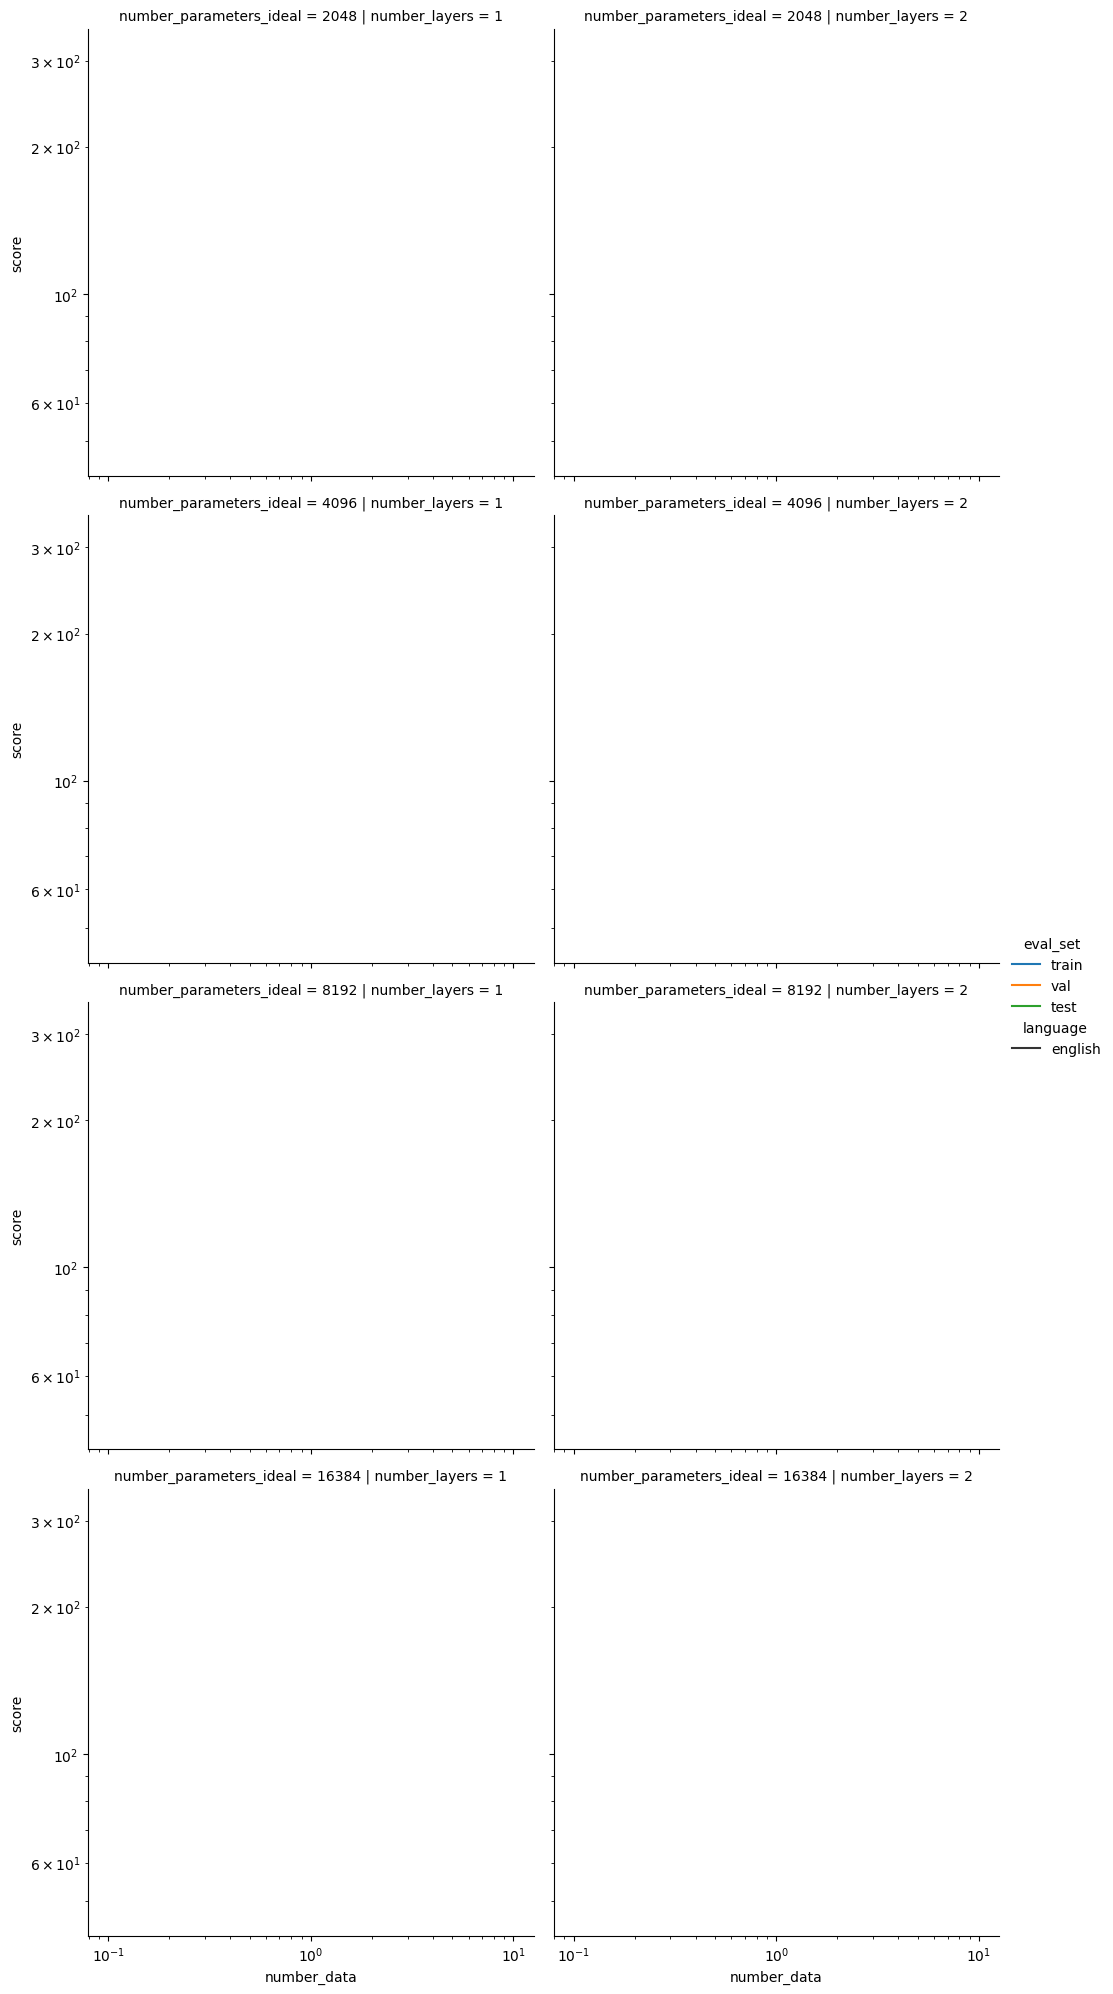

In [7]:
# eval_set number data number_layers number_parameters
g = sns.relplot(data=df_score, y='score', x='number_data', row='number_parameters_ideal', col='number_layers', hue='eval_set',style="language", kind='line', linewidth=3)
plt.xscale('log')
plt.yscale('log')

In [10]:
g = sns.relplot(data=df_score, y='loss', x='number_parameters_ideal', row='number_data',col='number_layers',hue='eval_set',style="language", kind='line', linewidth=3)
plt.xscale('log')
plt.yscale('log')

ValueError: Could not interpret value `loss` for parameter `y`

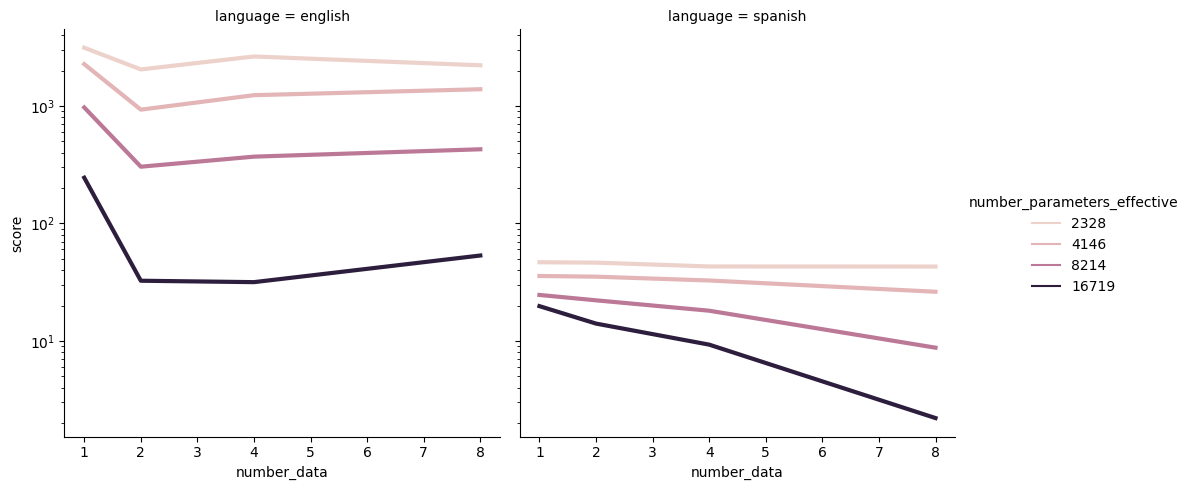

In [21]:
df = df_score[(df_score['eval_set'] == 'test') & (df_score['number_layers']==1)]
g = sns.relplot(data=df, y='score', x='number_data', hue="number_parameters_effective",col='language', kind='line', linewidth=3)
plt.yscale('log')

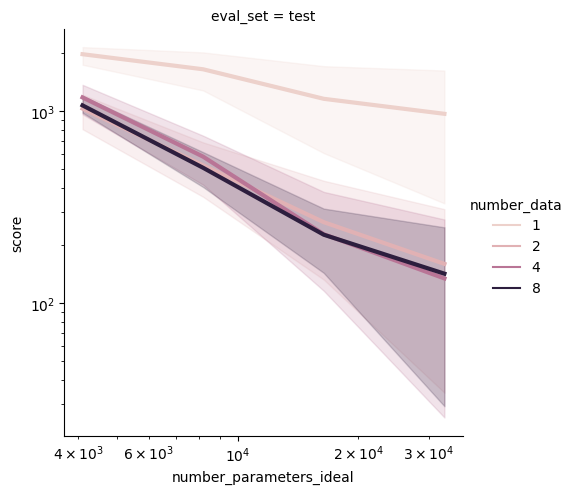

In [12]:
g = sns.relplot(data=df_score, y='score', x='number_parameters_ideal', hue='number_data', col='eval_set', kind='line', linewidth=3, col_order=['test'])
plt.xscale('log')
plt.yscale('log')

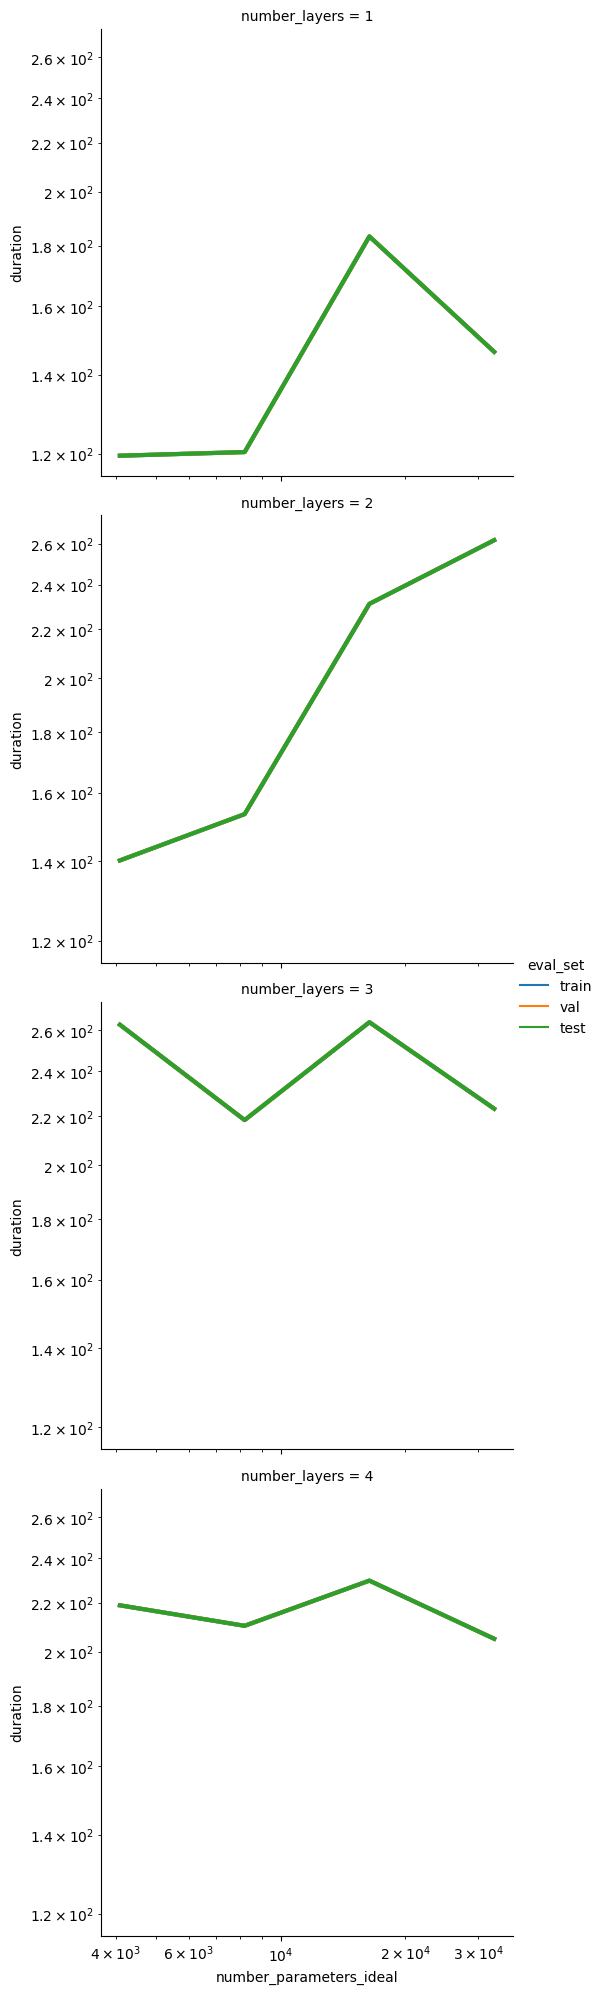

In [8]:
# eval_set number data number_layers number_parameters
g = sns.relplot(data=df_score, y='duration', x='number_parameters_ideal', row='number_layers', hue='eval_set', kind='line', linewidth=3)
plt.xscale('log')
plt.yscale('log')